<a href="https://colab.research.google.com/github/babatundeibukun/fastai_deep_learning/blob/main/chapter_05_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [ ]:
Path.BASE_PATH = path


In [ ]:
path.ls

<bound method Path.ls of Path('.')>

In [ ]:
(path/"images").ls()


(#7393) [Path('images/beagle_115.jpg'),Path('images/boxer_18.jpg'),Path('images/Maine_Coon_157.jpg'),Path('images/scottish_terrier_28.jpg'),Path('images/english_setter_6.jpg'),Path('images/american_pit_bull_terrier_79.jpg'),Path('images/boxer_128.jpg'),Path('images/Persian_265.jpg'),Path('images/Maine_Coon_182.jpg'),Path('images/keeshond_89.jpg'),Path('images/chihuahua_82.jpg'),Path('images/basset_hound_5.jpg'),Path('images/english_cocker_spaniel_144.jpg'),Path('images/scottish_terrier_108.jpg'),Path('images/British_Shorthair_116.jpg'),Path('images/boxer_10.jpg'),Path('images/basset_hound_194.jpg'),Path('images/beagle_85.jpg'),Path('images/japanese_chin_87.jpg'),Path('images/pug_40.jpg')...]

In [ ]:
fname = (path/"images").ls()[0]


In [ ]:
fname

Path('images/beagle_115.jpg')

In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

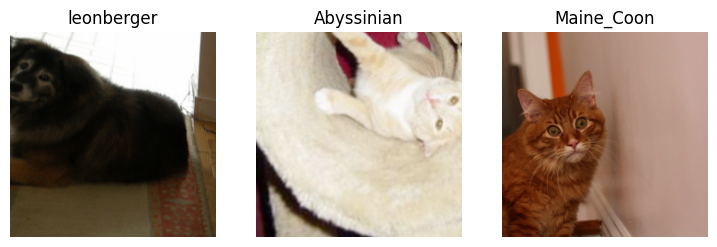

In [ ]:
dls.show_batch(nrows=1, ncols=3)


__Viewing Activations and Labels__


In [ ]:
x,y = dls.one_batch()


In [ ]:
y

TensorCategory([22, 30, 10, 23, 32,  7, 34, 33, 17,  8,  6,  9,  3, 31, 27, 28,
                27, 18, 14, 19,  8, 19, 29, 35,  4, 32, 10, 14, 10, 12, 36, 23,
                 4, 20, 34, 15, 33,  4, 29, 35, 10, 11, 20,  2, 16, 33, 29, 27,
                16, 34,  0, 18, 15, 22, 20, 17, 27, 22, 14, 13, 21, 19, 12, 15],
               device='cuda:0')

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 138MB/s] 


epoch,train_loss,valid_loss,error_rate,time
0,1.474712,0.376224,0.121786,00:35


epoch,train_loss,valid_loss,error_rate,time
0,0.519008,0.323050,0.103518,00:43
1,0.320863,0.239101,0.077131,00:47


In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([5.4192e-08, 1.1277e-06, 9.4834e-06, 7.8027e-07, 2.4396e-06, 2.3060e-06,
        3.5102e-05, 1.2878e-04, 2.4570e-05, 6.4704e-07, 9.9849e-07, 8.6562e-07,
        3.8623e-06, 9.5767e-07, 7.7629e-07, 7.0010e-06, 5.5828e-08, 6.7036e-07,
        8.9964e-05, 1.4918e-06, 9.3313e-07, 1.1945e-04, 9.7834e-01, 9.2335e-06,
        9.5239e-07, 2.6556e-07, 8.7058e-08, 1.3651e-06, 1.1589e-05, 2.5568e-06,
        4.0834e-07, 1.8625e-05, 7.5015e-04, 2.7492e-07, 5.0954e-06, 2.0375e-02,
        5.4170e-05])

In [ ]:
_[0]

NameError: name 'preds' is not defined